Load the data

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF

from sklearn.cluster import KMeans

from sklearn.metrics import r2_score

import warnings
warnings.simplefilter('ignore')

np.random.seed(0)

dow_jones = pd.read_csv("dow_jones_index.data")

V = dow_jones.pivot(index = "stock", columns = "date", values = "close")

V = V.replace('[\$,]', '', regex=True).astype(float)

V = V.T
V.head()

stock,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
1/14/2011,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
1/21/2011,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
1/28/2011,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
1/7/2011,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2/11/2011,17.37,46.75,72.14,14.77,103.54,18.70,96.45,54.58,43.41,21.33,...,33.07,27.25,18.83,64.73,28.47,58.99,85.20,36.39,55.69,82.82


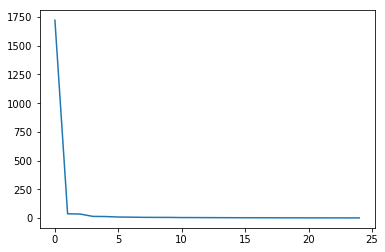

In [12]:
import scipy.sparse.linalg as sparse
import scipy as sp

U, s, V_svd = sp.linalg.svd(V, full_matrices=True)

fig = plt.figure()
plt.plot(s)
fig

Plot the difference of r2 (see where biggest changes in r2 are)

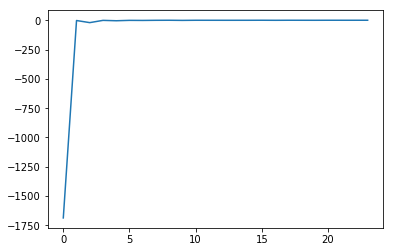

In [13]:
d = np.diff(s)
fig = plt.figure()
plt.plot(d)
fig

Use the elbow method to pick the optimal number of components and then display the cluster assignment

In [24]:
# Use elbow method
best_k = np.max( (np.argmax(np.abs(d)), 2))

print("Optimal Number of Components: {0}".format(best_k))

model = NMF(n_components=best_k, init='random', max_iter=10000)
W = model.fit_transform(V)
H = model.components_

# kmeans treats row as training example, so transpose H
kmeans = KMeans(n_clusters=best_k, random_state=0).fit(H.T)
# generate clustering labels for each training example
labels = kmeans.labels_

groups = [list() for i in range(best_k)]

for i in range(len(labels)):
    g = labels[i]
    groups[g].append(V.columns[i])

for i in range(len(groups)):
    print("Stock group {0}: ".format(i) + str(groups[i]))

Optimal Number of Components: 2
Stock group 0: ['AA', 'AXP', 'BAC', 'CSCO', 'DD', 'DIS', 'GE', 'HD', 'HPQ', 'INTC', 'JPM', 'KRFT', 'MRK', 'MSFT', 'PFE', 'T', 'VZ', 'WMT']
Stock group 1: ['BA', 'CAT', 'CVX', 'IBM', 'JNJ', 'KO', 'MCD', 'MMM', 'PG', 'TRV', 'UTX', 'XOM']
